In [88]:
import torch
import torch.nn as nn
import torch.functional as F
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import json

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [92]:
path = r'C:\Users\nirko\Downloads\train_val_images\train_images'
img_ids = os.listdir(path)
files = [os.path.join(path, f) for f in img_ids]
files

['C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\0000599864fd15b3.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\0000e8b36676338b.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\00010bf498b64bab.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\00012db06b98f573.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\00016982f6086d39.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\0001a2f47097ee27.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\0001c6bf48e16ab2.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\000209d575f3aa4f.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\000228608388803f.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\0002c799b0cd7412.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train_images\\0002cb8d8ea5eb7e.jpg',
 'C:\\Users\\nirko\\Downloads\\train_val_images\\train

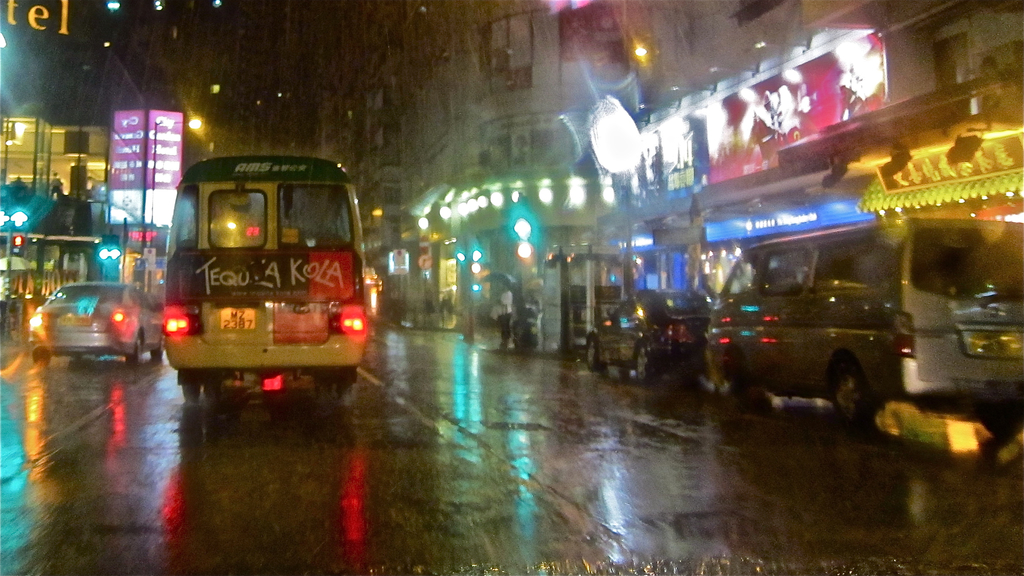

In [93]:
%matplotlib inline
from IPython.display import Image
ex_img = Image(files[2])
ex_img

In [94]:
path_to_bounding_boxes = r'C:\Users\nirko\Downloads\TextOCR_0.1_train.json'
with open(path_to_bounding_boxes, 'r') as f:
    bounding_boxes = json.load(f)
bounding_boxes

{'info': {},
 'imgs': {'a4ea732cd3d5948a': {'id': 'a4ea732cd3d5948a',
   'width': 840,
   'height': 1024,
   'set': 'train',
   'file_name': 'train/a4ea732cd3d5948a.jpg'},
  '4bf43a7b2a898044': {'id': '4bf43a7b2a898044',
   'width': 1024,
   'height': 683,
   'set': 'train',
   'file_name': 'train/4bf43a7b2a898044.jpg'},
  '1b55b309b0f50d02': {'id': '1b55b309b0f50d02',
   'width': 1024,
   'height': 683,
   'set': 'train',
   'file_name': 'train/1b55b309b0f50d02.jpg'},
  '00c359f294f7dcd9': {'id': '00c359f294f7dcd9',
   'width': 1024,
   'height': 680,
   'set': 'train',
   'file_name': 'train/00c359f294f7dcd9.jpg'},
  '04b5a37f762b0f51': {'id': '04b5a37f762b0f51',
   'width': 768,
   'height': 1024,
   'set': 'train',
   'file_name': 'train/04b5a37f762b0f51.jpg'},
  'b3c4d860c380c674': {'id': 'b3c4d860c380c674',
   'width': 1024,
   'height': 682,
   'set': 'train',
   'file_name': 'train/b3c4d860c380c674.jpg'},
  'edecba688d135d36': {'id': 'edecba688d135d36',
   'width': 705,
   'hei

In [95]:
img_props = bounding_boxes['imgs'][img_ids[4][:-4]]
img_anns = bounding_boxes['imgToAnns'][img_ids[4][:-4]]
ann = bounding_boxes['anns'][img_anns[0]]
ann

{'id': '00016982f6086d39_1',
 'image_id': '00016982f6086d39',
 'bbox': [4.74, 82.48, 22.86, 16.7],
 'utf8_string': '3G',
 'points': [4.74, 82.48, 27.6, 82.48, 27.6, 99.18, 4.74, 99.0],
 'area': 381.76}

In [77]:
img_with_annotations = cv2.imread(files[4])
# img_with_annotations = cv2.cvtColor(img_with_annotations, cv2.COLOR_BGR2RGB)
# x1, y1, x2, y2 = ann['bbox']
# x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
# points = ann['bbox']
# cv2.circle(img_with_annotations, (int(points[0]), int(points[1])), 5, (0, 0, 255), -1)
# cv2.circle(img_with_annotations, (int(points[2]) + int(points[0]), int(points[3]) + int(points[1])), 5, (0, 0, 255), -1)
for i in range(len(img_anns)):
    ann = bounding_boxes['anns'][img_anns[i]]
    points = ann['bbox']
    x1, y1, x2, y2 = int(points[0]), int(points[1]), int(points[2]) + int(points[0]), int(points[3]) + int(points[1])
    cv2.rectangle(img_with_annotations, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.putText(img_with_annotations, str(ann['utf8_string']), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
cv2.imwrite('img_with_annotations.jpg', img_with_annotations)

True

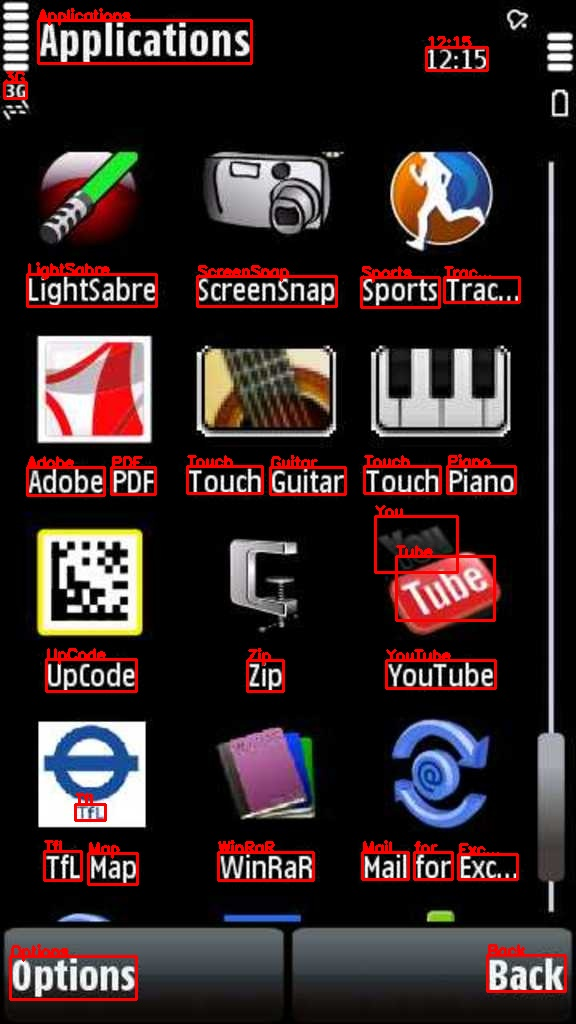

In [78]:
Image('img_with_annotations.jpg')

Average width:  948.6400955092295
Average height:  817.0074386996051
Length of widths:  21778


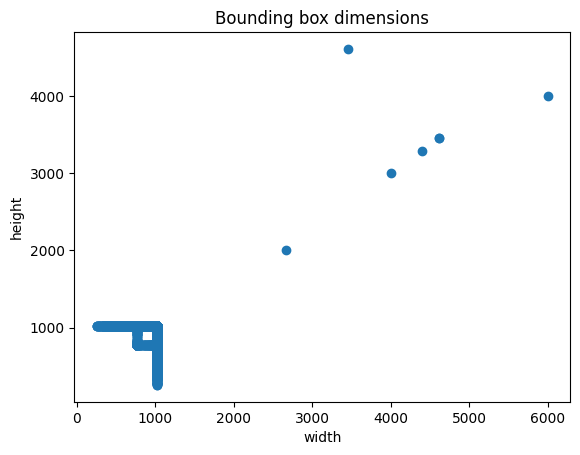

In [82]:
widths = []
heights = []
for img in bounding_boxes['imgs']:
    widths.append(bounding_boxes['imgs'][img]['width'])
    heights.append(bounding_boxes['imgs'][img]['height'])
print('Average width: ', np.mean(widths))
print('Average height: ', np.mean(heights))
print('Length of widths: ', len(widths))
plt.scatter(widths, heights)
plt.xlabel('width')
plt.ylabel('height')
plt.title('Bounding box dimensions')
plt.show()

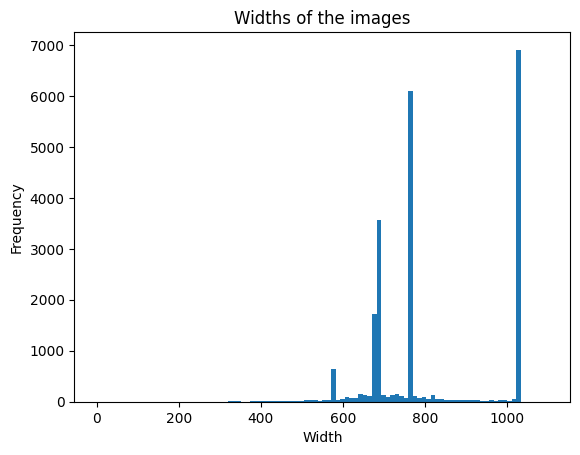

In [87]:
plt.hist(heights, bins=100, range=(0, 1100))
plt.title("Widths of the images")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()